# CLASIFICATIONS MODELS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preproc  
import pingouin as pg
from sklearn.model_selection import train_test_split


In [2]:
missing_value_formats = ["n.a.","?","NA",":", "na", "--"]
df = pd.read_csv("apro_mk_colm_1_Data.csv", na_values = missing_value_formats)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176220 entries, 0 to 176219
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TIME                176220 non-null  object 
 1   GEO                 176220 non-null  object 
 2   DAIRYPROD           176220 non-null  object 
 3   UNIT                176220 non-null  object 
 4   Value               58156 non-null   float64
 5   Flag and Footnotes  14097 non-null   object 
dtypes: float64(1), object(5)
memory usage: 8.1+ MB


In [4]:
df.head()

,TIME,GEO,DAIRYPROD,UNIT,Value,Flag and Footnotes
0,2000M01,European Union - 27 countries (from 2020),Raw cows' milk delivered to dairies,Thousand tonnes,NaN,NaN
1,2000M01,European Union - 27 countries (from 2020),Raw cows' milk delivered to dairies,Fat content (% of product weight),NaN,NaN
2,2000M01,European Union - 27 countries (from 2020),Raw cows' milk delivered to dairies,Protein content (% of product weight),NaN,NaN
3,2000M01,European Union - 27 countries (from 2020),Raw cream delivered to dairies (in milk equiva...,Thousand tonnes,NaN,NaN
4,2000M01,European Union - 27 countries (from 2020),Raw cream delivered to dairies (in milk equiva...,Fat content (% of product weight),NaN,NaN


# CLEANING

In [5]:
#delete columns and change names of columns

df = df.rename(columns={"GEO": "Country"})
df = df.drop(["Flag and Footnotes"], axis=1)


In [6]:
#identify countries for the study

df.Country.unique() 

array(['European Union - 27 countries (from 2020)',
       'European Union - 28 countries (2013-2020)',
       'European Union - 27 countries (2007-2013)',
       'European Union - 25 countries (2004-2006)',
       'European Union - 15 countries (1995-2004)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland', 'Sweden',
       'European Economic Area (EEA18-1995, EEA28-2004, EEA30-2007, EEA31-2013, EEA30-2020)',
       'European Free Trade Association', 'Iceland', 'Norway',
       'Switzerland', 'United Kingdom', 'Montenegro', 'North Macedonia',
       'Albania', 'Serbia', 'Turkey', 'Bosnia and Herzegovina'],
      dtype=object)

In [7]:
#some countries have special characteres

df["DAIRYPROD"]=df["DAIRYPROD"].str.replace("[^\w\s]","")
#df["Value"]=df["Value"].str.replace("[^\w\,]","")



C:\Users\fenix\AppData\Local\Temp/ipykernel_10848/3404780919.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["DAIRYPROD"]=df["DAIRYPROD"].str.replace("[^\w\s]","")


In [8]:
#filter countries and data 

country_list = ['Belgium',"Denmark","Sweden","Ireland","Austria"]
df1 = df[df['Country'].isin(country_list)]
dairy_list = ["Raw cows milk delivered to dairies","Drinking milk","Cream for direct consumption"]
df1= df1[df['DAIRYPROD'].isin(dairy_list)]


C:\Users\fenix\AppData\Local\Temp/ipykernel_10848/2944127415.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1= df1[df['DAIRYPROD'].isin(dairy_list)]


In [9]:
#drop na and duplicates

df1=df1.dropna(subset=["Value"])
df = df1.drop_duplicates()
df.head()

,TIME,Country,DAIRYPROD,UNIT,Value
75,2000M01,Belgium,Raw cows milk delivered to dairies,Thousand tonnes,260.02
76,2000M01,Belgium,Raw cows milk delivered to dairies,Fat content (% of product weight),4.18
77,2000M01,Belgium,Raw cows milk delivered to dairies,Protein content (% of product weight),3.34
81,2000M01,Belgium,Drinking milk,Thousand tonnes,53.93
84,2000M01,Belgium,Cream for direct consumption,Thousand tonnes,5.50


In [10]:
#step before merging and melting, we need to change the layout of the dataset.

milk_delivered_to_dairies=df.query("DAIRYPROD=='Raw cows milk delivered to dairies'")
milk_delivered_to_dairies = milk_delivered_to_dairies.drop(["DAIRYPROD"], axis=1)


drinking_milk=df.query("DAIRYPROD=='Drinking milk'")
drinking_milk = drinking_milk.drop(["DAIRYPROD"], axis=1)

cream =df.query("DAIRYPROD=='Cream for direct consumption'")
cream = cream.drop(["DAIRYPROD"], axis=1)



In [11]:
#second step before merging and melting, in order to change the layout of the dataset.


milk_delivered_to_dairies_tonnes=milk_delivered_to_dairies.query("UNIT=='Thousand tonnes'")
milk_delivered_to_dairies_Fat=milk_delivered_to_dairies.query("UNIT=='Fat content (% of product weight)'")
milk_delivered_to_dairies_Protein=milk_delivered_to_dairies.query("UNIT=='Protein content (% of product weight)'")


milk_delivered_to_dairies_tonnes = milk_delivered_to_dairies_tonnes.rename(columns={"Value": "Thousand_tonnes_to_dairies"})
milk_delivered_to_dairies_Fat=milk_delivered_to_dairies_Fat.rename(columns={"Value": "Fat_content"})
milk_delivered_to_dairies_Protein=milk_delivered_to_dairies_Protein.rename(columns={"Value": "Protein_content"})
drinking_milk=drinking_milk.rename(columns={"Value": "drinking_milk"})
cream=cream.rename(columns={"Value": "Cream"})



#columns are not necesary 
milk_delivered_to_dairies_tonnes = milk_delivered_to_dairies_tonnes.drop(["UNIT"], axis=1)
milk_delivered_to_dairies_Fat = milk_delivered_to_dairies_Fat.drop(["UNIT"], axis=1)
milk_delivered_to_dairies_Protein = milk_delivered_to_dairies_Protein.drop(["UNIT"], axis=1)
drinking_milk=drinking_milk.drop(["UNIT"], axis=1)
cream=cream.drop(["UNIT"], axis=1)


In [12]:
#We created 5 datasets that they will be combining in the next step.

#milk_delivered_to_dairies_tonnes.head()
#milk_delivered_to_dairies_Fat.head()
#milk_delivered_to_dairies_Protein.head()
cream.head()


,TIME,Country,Cream
84,2000M01,Belgium,5.5
129,2000M01,Denmark,4.6
174,2000M01,Ireland,0.7
369,2000M01,Austria,4.0
474,2000M01,Sweden,7.3


# COMBINING DATA 

In [13]:
milk_delivered_to_dairies=pd.merge(milk_delivered_to_dairies_tonnes , milk_delivered_to_dairies_Fat ,on=["TIME","Country"]) #INNER MERGE
milk_delivered_to_dairies=pd.merge(milk_delivered_to_dairies , milk_delivered_to_dairies_Protein, on=["TIME","Country"])
dairy_production=pd.merge(milk_delivered_to_dairies , drinking_milk, on=["TIME","Country"])
dairy_production=pd.merge(dairy_production , cream, on=["TIME","Country"])

In [14]:

dairy_production.info() #machine learning database

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1329
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TIME                        1330 non-null   object 
 1   Country                     1330 non-null   object 
 2   Thousand_tonnes_to_dairies  1330 non-null   float64
 3   Fat_content                 1330 non-null   float64
 4   Protein_content             1330 non-null   float64
 5   drinking_milk               1330 non-null   float64
 6   Cream                       1330 non-null   float64
dtypes: float64(5), object(2)
memory usage: 83.1+ KB


Text(0.5, 1.0, 'Correlation')

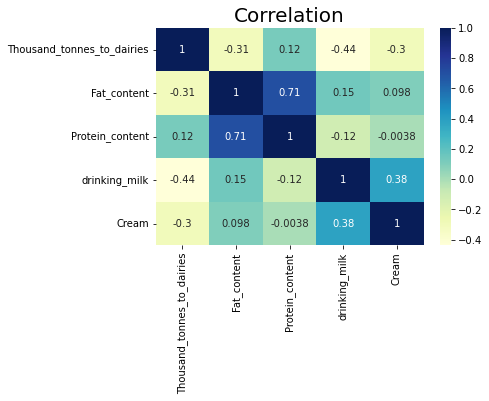

In [15]:
dataplot = sns.heatmap(dairy_production.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation', fontsize = 20)



# KNeighborsClassifier

In [16]:
#dairy_production_k = dairy_production[['TIME','Thousand tonnes to dairies','Fat content','Protein content','drinking_milk','Cream']]
dairy_production_k = dairy_production.reindex(columns=['Thousand_tonnes_to_dairies','Fat_content','Protein_content','drinking_milk','Cream','Country'])


In [17]:


from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

X = dairy_production_k.iloc[:,:4]
y = dairy_production_k.iloc[:,5]
# split into test and train dataset, and use random_state=48
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 3)
# train the model
knn.fit(X_train, y_train)
# get the predict value from X_test
y_pred = knn.predict(X_test)
# print the score
print('accuracy: ', knn.score(X_test, y_test))
# accuracy:  0.973684210526

accuracy:  0.8120300751879699


In [18]:
neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))   

In [19]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

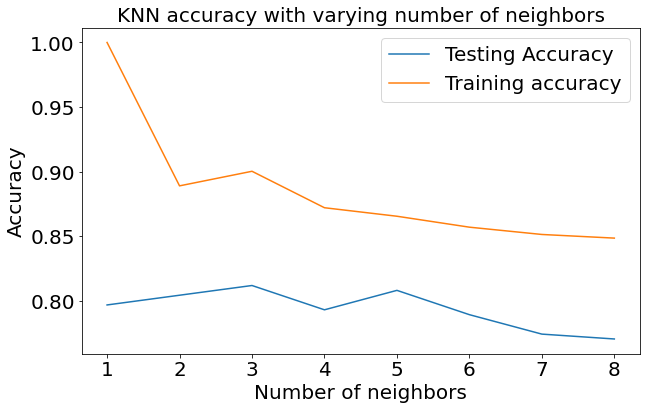

In [20]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

              precision    recall  f1-score   support

     Austria       0.65      0.69      0.67        54
     Belgium       0.85      0.80      0.83        51
     Denmark       0.91      0.98      0.94        59
     Ireland       0.89      0.83      0.86        48
      Sweden       0.77      0.74      0.75        54

    accuracy                           0.81       266
   macro avg       0.81      0.81      0.81       266
weighted avg       0.81      0.81      0.81       266



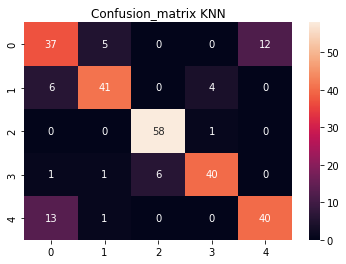

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.title("Confusion_matrix KNN")

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

# cross_val_score KNeighborsClassifier

In [22]:
# import k-folder
from sklearn.model_selection import cross_val_score # use the same model as before
knn = KNeighborsClassifier(n_neighbors = 3)
# X,y will automatically devided by 4 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, X,y, cv=5, scoring='accuracy')
# print all 5 times scores 
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())
# 0.973333333333

[0.7406015  0.7481203  0.78195489 0.77443609 0.59774436]
0.7285714285714286


# GaussianNB

In [23]:
# Spliting the dataset into independent and dependent variables

X = np.asarray(dairy_production_k.drop('Country', 1))
y = np.asarray(dairy_production_k['Country'])


X,y

C:\Users\fenix\AppData\Local\Temp/ipykernel_10848/2092287471.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.asarray(dairy_production_k.drop('Country', 1))


(array([[260.02,   4.18,   3.34,  53.93,   5.5 ],
        [374.5 ,   4.4 ,   3.43,  45.2 ,   4.6 ],
        [122.4 ,   3.73,   3.09,  44.7 ,   0.7 ],
        ...,
        [365.74,   4.43,   3.43,  37.14,   1.35],
        [264.78,   4.3 ,   3.43,  60.72,   5.52],
        [222.41,   4.32,   3.54,  54.71,   5.18]]),
 array(['Belgium', 'Denmark', 'Ireland', ..., 'Ireland', 'Austria',
        'Sweden'], dtype=object))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1330, 5), (1330,), (1064, 5), (1064,), (266, 5), (266,))

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 0.7186279 ,  1.23829218,  2.04867871, -0.85369524, -0.60531207],
       [-0.57167684,  0.53680519,  0.52636419,  2.06746053,  0.08202439],
       [-0.58903633,  0.28627413, -0.03448853,  0.53341139,  0.52247276],
       ...,
       [ 0.16713527,  0.9376549 ,  0.36612056, -1.30760145, -0.40780159],
       [-0.638796  ,  0.83744247,  1.00709509,  0.17567174, -0.35052355],
       [-0.47961517,  0.53680519, -0.51521943,  1.90820869,  0.02672146]])

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = gnb.predict(X_test)
#print(y_pred)

In [28]:
y_compare = np.vstack((y_test, y_pred)).T
y_compare[:10, :]

array([['Denmark', 'Denmark'],
       ['Sweden', 'Sweden'],
       ['Sweden', 'Sweden'],
       ['Denmark', 'Denmark'],
       ['Austria', 'Austria'],
       ['Belgium', 'Belgium'],
       ['Austria', 'Austria'],
       ['Denmark', 'Denmark'],
       ['Ireland', 'Ireland'],
       ['Belgium', 'Belgium']], dtype=object)

              precision    recall  f1-score   support

     Austria       0.86      0.94      0.90        64
     Belgium       1.00      0.86      0.92        49
     Denmark       1.00      1.00      1.00        55
     Ireland       1.00      1.00      1.00        48
      Sweden       0.82      0.84      0.83        50

    accuracy                           0.93       266
   macro avg       0.94      0.93      0.93       266
weighted avg       0.93      0.93      0.93       266



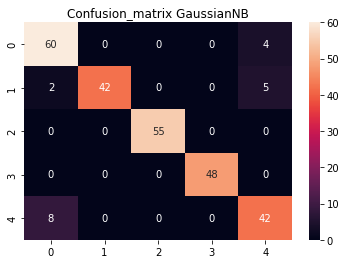

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)
plt.title("Confusion_matrix GaussianNB")
# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [30]:
rowsCols = cm.shape
corrPred = 0
falsePred = 0

for row in range(rowsCols[0]):
    for col in range(rowsCols[1]):
        if row == col:
            corrPred += cm[row, col]
        else:
            falsePred += cm[row, col]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum())) 

Correct predictions:  247
False predictions 19


Accuracy of the Naive Bayes Clasification is:  0.9285714285714286


# cross_val_score GaussianNB

In [31]:
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
cross_val_score(gnb, X, y, scoring='accuracy', cv = 5).mean()

0.9097744360902256

# Regression

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_theme();

#%matplotlib inline

In [33]:
production = pd.read_csv('Production_Crops_Livestock_E_All_Data.csv',encoding='latin-1')
prices = pd.read_csv('Prices_E_All_Data.csv',encoding='latin-1')
GDP = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4019678.csv',skiprows=4)
imports_gb = pd.read_csv('Trade_CropsLivestock_E_All_Data.csv',encoding='latin-1')

# CLEANING

In [34]:
production= production.rename(columns={"Area": "Country"})
imports_gb= imports_gb.rename(columns={"Area": "Country"})

production_milk=production[(production["Country"]=='Ireland') & (production["Item Code"]==1780) & (production["Element Code"]==5510)]
production_milk.head()
#filtered_df = df[(df['col1'] >= 1) & (df['col1'] <= 5)]

,Area Code,Country,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
26584,104,Ireland,1780,"Milk, Total",5510,Production,tonnes,2356000.0,2450800.0,2461100.0,...,5536680.0,5387770.0,5583670.0,5816220.0,6585120.0,6851430.0,7478160.0,7831250.0,8244870.0,8561470.0


In [35]:
cattle = production_milk.rename(columns={"Area": "Country"})
cattle=production[(production["Country"]=='Ireland') & (production["Item Code"]==866)]
cattle.head()

,Area Code,Country,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
26323,104,Ireland,866,Cattle,5111,Stocks,Head,4291200.0,4179200.0,4300600.0,...,6493000.0,6754100.0,6902600.0,6926100.0,6963500.0,7221200.0,7363498.0,6593490.0,6559650.0,6529440.0


In [36]:
prices = prices.rename(columns={"Area": "Country"})

prices=prices[(prices["Country"]=='Ireland') & (prices["Item Code"]==1780)]
prices.head()

,Area Code,Country,Item Code,Item,Element Code,Element,Months Code,Months,Unit,Y1991,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
38014,104,Ireland,1780,"Milk, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,NaN,80.0,...,86.0,Im,115.0,Im,116.0,Im,111.0,Im,NaN,NaN


In [37]:
GDP=GDP[(GDP["Country Name"]=='United Kingdom') | (GDP["Country Name"]=="Ireland")]
GDP = GDP.rename(columns={"Country Name": "Country"})

GDP.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
81,United Kingdom,GBR,GDP per capita (current US$),NY.GDP.PCAP.CD,1397.594803,1472.385714,1525.775853,1613.456884,1748.288118,1873.567774,...,43713.814124,47787.241298,45404.567773,41499.555703,40857.755583,43646.951971,43070.498360,41059.168809,NaN,NaN
111,Ireland,IRL,GDP per capita (current US$),NY.GDP.PCAP.CD,685.614712,739.276406,797.006288,852.135302,965.135423,1023.773726,...,51533.034565,55599.850800,62012.484926,62861.639116,69774.028972,79107.604993,80886.615739,85422.542868,NaN,NaN


In [38]:
imports_gb=imports_gb[(imports_gb["Item Code"]==886) | (imports_gb["Item Code"]==901) |  (imports_gb["Item Code"]==882)]
imports_gb=imports_gb[(imports_gb["Country"]=='United Kingdom of Great Britain and Northern Ireland') & (imports_gb["Element Code"]==5610)]

imports_gb.head()

,Area Code,Country,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
264694,229,United Kingdom of Great Britain and Northern I...,886,"Butter, cow milk",5610,Import Quantity,tonnes,429800.0,NaN,413409.0,...,93908.0,NaN,83006.0,NaN,81483.0,NaN,76496.0,NaN,79171.0,NaN
264792,229,United Kingdom of Great Britain and Northern I...,901,"Cheese, whole cow milk",5610,Import Quantity,tonnes,136618.0,NaN,140916.0,...,416195.0,NaN,430026.0,NaN,459896.0,NaN,478679.0,NaN,452921.0,NaN
265463,229,United Kingdom of Great Britain and Northern I...,882,"Milk, whole fresh cow",5610,Import Quantity,tonnes,1397.0,NaN,1651.0,...,82321.0,NaN,176250.0,NaN,187194.0,NaN,165053.0,NaN,172592.0,NaN


In [39]:
production_milk= production_milk.drop(["Area Code","Country","Item Code","Item","Element Code","Element","Unit"], axis=1)
cattle=cattle.drop (["Area Code","Country","Item Code","Item","Element Code","Element","Unit"], axis=1)
prices= prices.drop(["Area Code", "Country","Item Code","Item","Element Code","Element","Months Code","Months","Unit"], axis=1)
GDP= GDP.drop(["Country Code", "Indicator Name","Indicator Code"], axis=1)
imports_gb=imports_gb.drop (["Area Code","Country","Item Code","Country","Element Code","Element","Unit"], axis=1)

#  MELT 

In [40]:
production_milk= production_milk.melt(var_name="Year", value_name="milk_production")

cattle= cattle.melt(var_name="Year", value_name="cattle_heads")

prices= prices.melt(var_name="Year", value_name="prices producer")


GDP= GDP.melt(id_vars=["Country"],
                 var_name="Year",
                 value_name="GDP")

imports_gb= imports_gb.melt(id_vars=["Item"],
                 var_name="Year",
                 value_name="import")

In [41]:
cattle.head()

,Year,cattle_heads
0,Y1961,4291200.0
1,Y1962,4179200.0
2,Y1963,4300600.0
3,Y1964,4368800.0
4,Y1965,4524200.0


In [42]:
Milk_import_uk=imports_gb.query("Item=='Milk, whole fresh cow'")
Butter_import_uk=imports_gb.query("Item=='Butter, cow milk'")
Cheese_import_uk=imports_gb.query("Item=='Cheese, whole cow milk'")
GDP_gb=GDP.query("Country=='United Kingdom'")
GDP_ireland=GDP.query("Country=='Ireland'")



#milk_delivered_to_dairies=df.query("DAIRYPROD=='Raw cows milk delivered to dairies'")

Milk_import_uk = Milk_import_uk.rename(columns={"import": "Milk_import_uk"})
Butter_import_uk = Butter_import_uk.rename(columns={"import": "Butter_import_uk"})
Cheese_import_uk = Cheese_import_uk.rename(columns={"import": "Cheese_import_uk"})
GDP_uk = GDP_gb.rename(columns={"GDP": "GDP_uk"})
GDP_ireland= GDP_ireland.rename(columns={"GDP": "GDP_ireland"})

# COMBINING DATA 

In [43]:
inner_merged1=pd.merge(production_milk, cattle,on=["Year"])
inner_merged2=pd.merge(inner_merged1, prices,on=["Year"])
inner_merged3=pd.merge(inner_merged2, Milk_import_uk,on=["Year"])
inner_merged4=pd.merge(inner_merged3, Butter_import_uk,on=["Year"])
inner_merged5=pd.merge(inner_merged4, Cheese_import_uk,on=["Year"])


inner_merged5["Year"] = inner_merged5["Year"].apply(lambda x: x.replace("Y", ""))

production_milk_ireland=pd.merge(inner_merged5, GDP_uk,on=["Year"])
production_milk_ireland=pd.merge(production_milk_ireland, GDP_ireland,on=["Year"])


production_milk_ireland=production_milk_ireland.drop (["Item_x","Item_y","Item","Country_x","Country_y"], axis=1)


production_milk_ireland.head()

,Year,milk_production,cattle_heads,prices producer,Milk_import_uk,Butter_import_uk,Cheese_import_uk,GDP_uk,GDP_ireland
0,1991,5281800.0,6100500.0,80.0,18995.0,104220.0,190382.0,19900.726651,14087.207439
1,1992,5326100.0,6147400.0,87.0,70667.0,126074.0,228440.0,20487.170785,15714.384749
2,1993,5267400.0,6236400.0,93.0,45362.0,112741.0,184138.0,18389.019568,14657.061555
3,1994,5336500.0,6263900.0,93.0,91076.0,116250.0,212994.0,19709.238098,15902.929676
4,1995,5346800.0,6343900.0,98.0,74183.0,102764.0,178642.0,23206.568559,19158.456477


In [44]:
production_milk_ireland[[ 'cattle_heads','prices producer','Milk_import_uk','Butter_import_uk','Cheese_import_uk']] = production_milk_ireland[['cattle_heads','prices producer','Milk_import_uk','Butter_import_uk','Cheese_import_uk']].astype(float)
production_milk_ireland['Year']= production_milk_ireland['Year'].astype(str).astype(int)

production_milk_ireland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              30 non-null     int32  
 1   milk_production   30 non-null     float64
 2   cattle_heads      30 non-null     float64
 3   prices producer   29 non-null     float64
 4   Milk_import_uk    30 non-null     float64
 5   Butter_import_uk  30 non-null     float64
 6   Cheese_import_uk  30 non-null     float64
 7   GDP_uk            30 non-null     float64
 8   GDP_ireland       30 non-null     float64
dtypes: float64(8), int32(1)
memory usage: 2.2 KB


In [45]:
production_milk_ireland['prices producer'].interpolate(method='linear', direction = 'forward', 
inplace=True)
print(production_milk_ireland.isnull().sum())

Year                0
milk_production     0
cattle_heads        0
prices producer     0
Milk_import_uk      0
Butter_import_uk    0
Cheese_import_uk    0
GDP_uk              0
GDP_ireland         0
dtype: int64


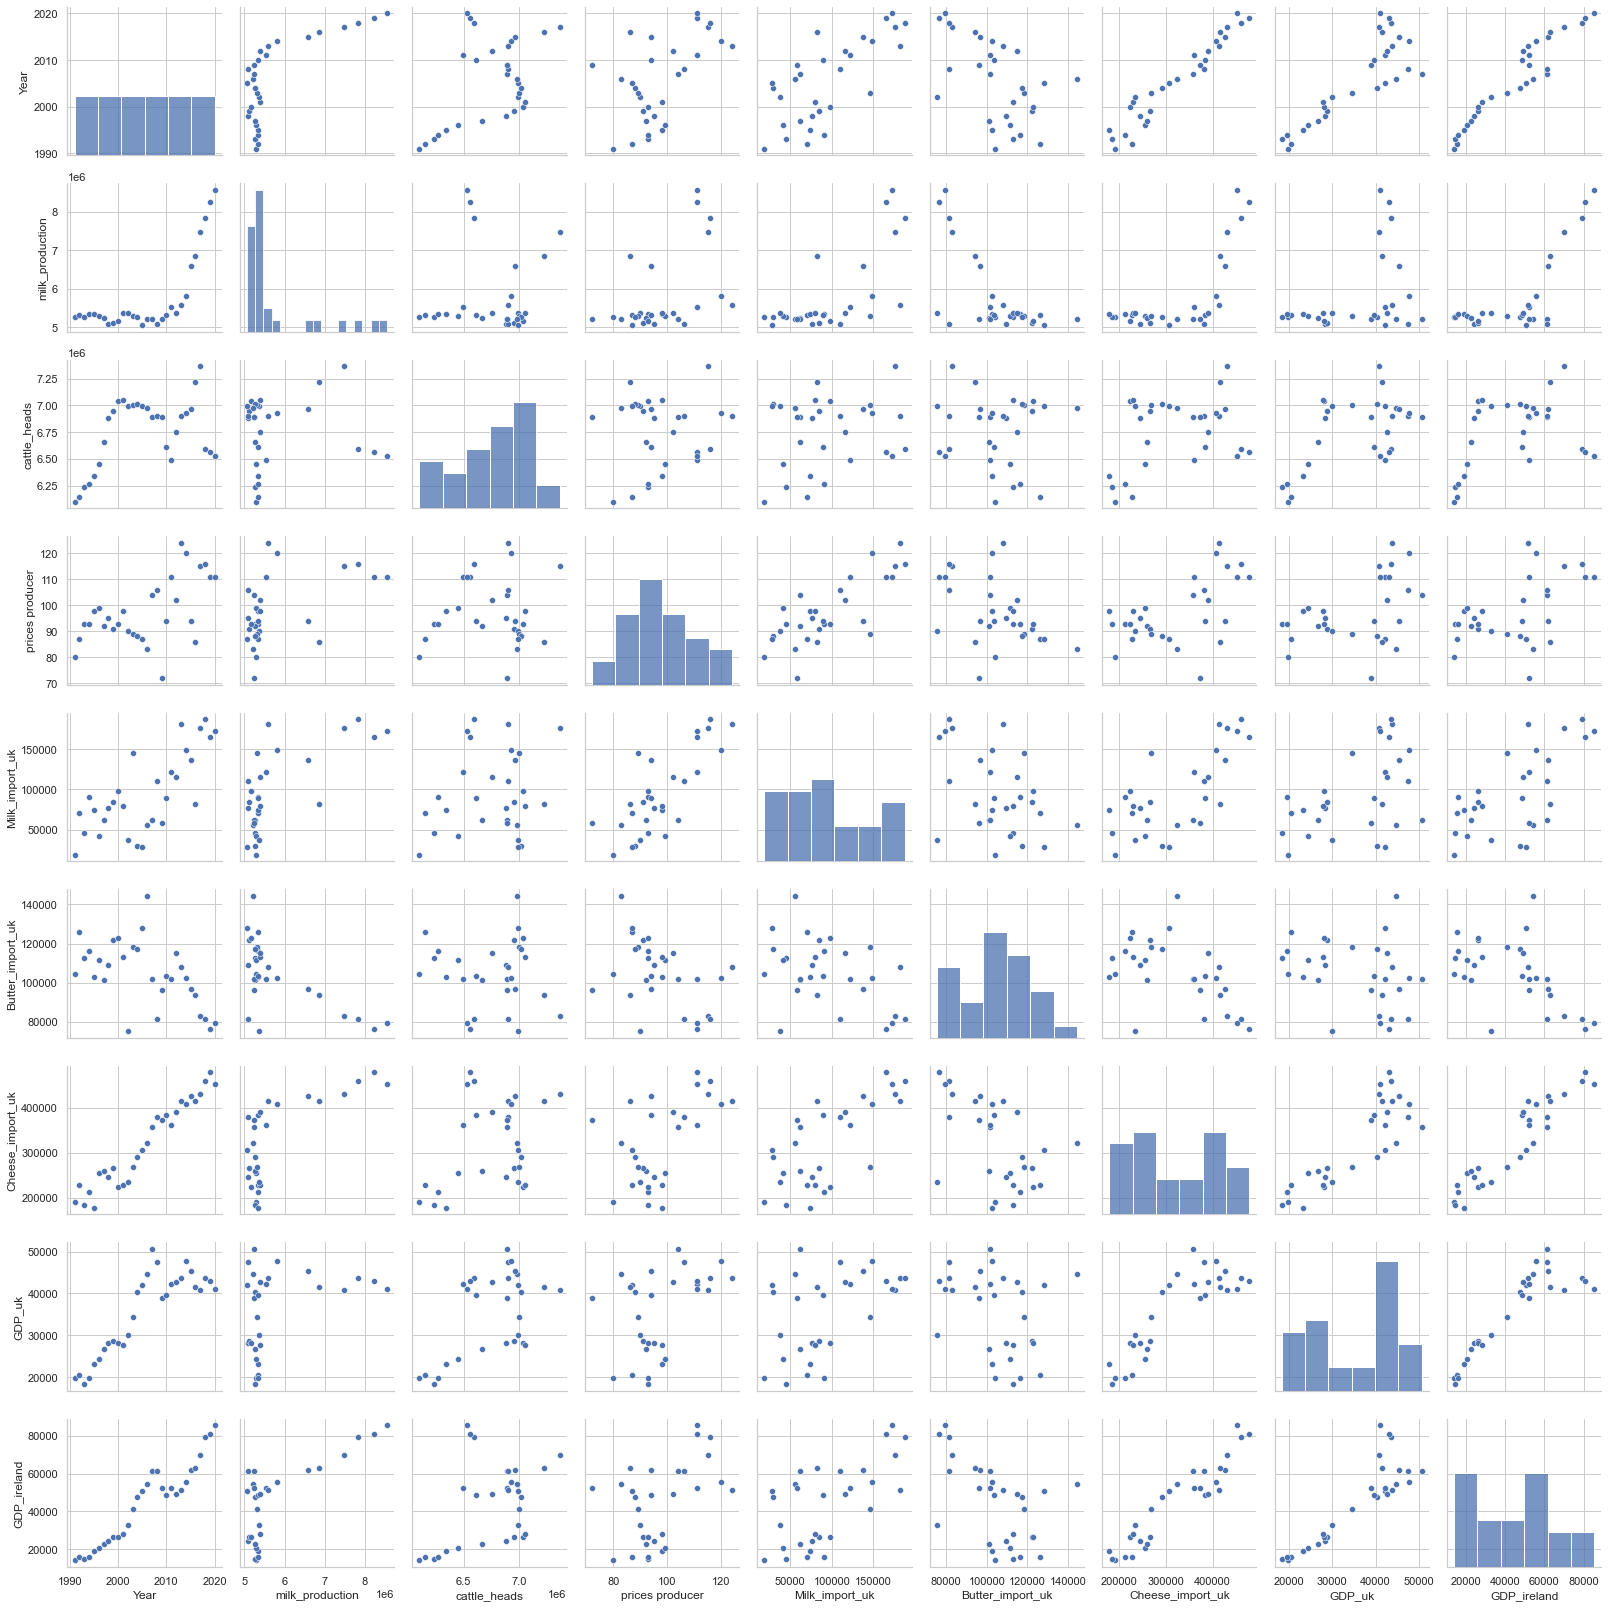

In [46]:
sns.set(style='whitegrid', context='notebook')

# Consider the following columns from the entire dataset
#cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# Display the pairplot using the above-mentioned columns
sns.pairplot(production_milk_ireland, height = 2.5)

plt.tight_layout()

# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

<AxesSubplot:>

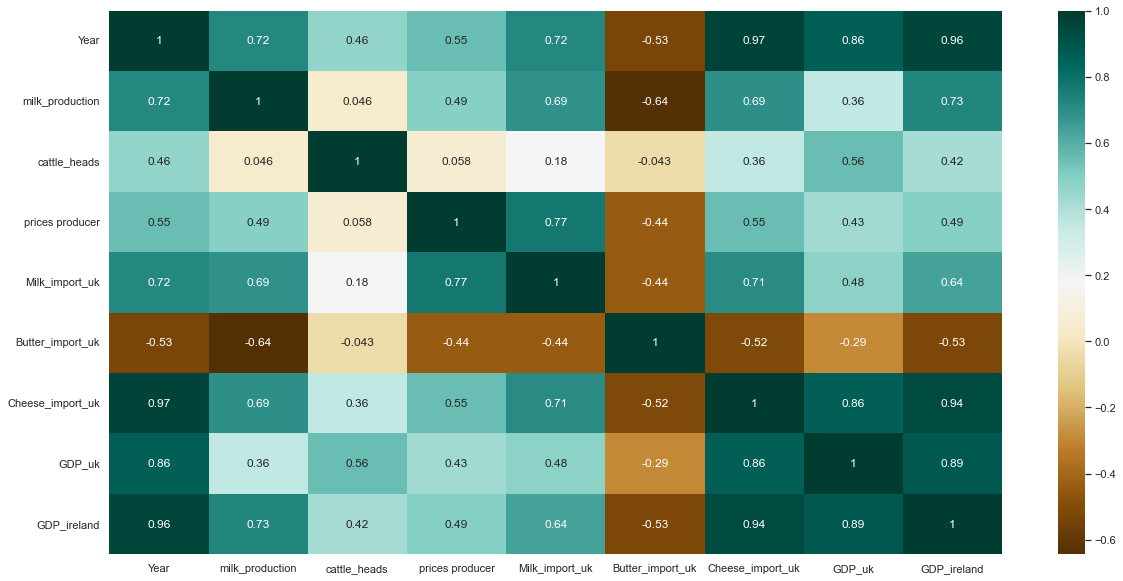

In [47]:
plt.figure(figsize=(20,10)) 
c = production_milk_ireland.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Regression Model

In [48]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create X and y objects
X = production_milk_ireland[['Year', 'cattle_heads', 'prices producer', 'Milk_import_uk', 'Butter_import_uk', 'Cheese_import_uk', 'GDP_uk','GDP_ireland']]
y = production_milk_ireland['milk_production']


# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, shuffle = True)


# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



 #Applying PCA function on trainingv and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 8) #min 5 7 are good 8 is the best result
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_



# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

# Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the training and test score
print(train_r2, test_r2)

# Plot result
#plt.plot(list(test_fcst))
#plt.plot(list(y_test))
#plt.xlabel('')
#plt.ylabel('')
#plt.show()
print(explained_variance)

0.9519459033136926 0.8744849041167101
[0.61352944 0.17012603 0.10188329 0.06093828 0.0355974  0.00967825
 0.00546103 0.00278629]


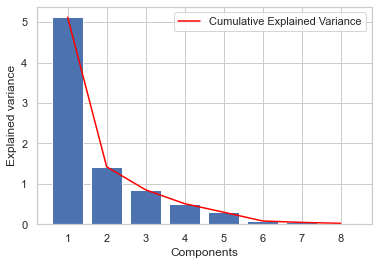

In [49]:
plt.bar(range(1,len(pca.explained_variance_ ) + 1), pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(pca.explained_variance_ ) + 1), pca.explained_variance_,
         c = 'red',
         label = "Cumulative Explained Variance")
plt.legend(loc = 'best')

In [50]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0,0.0,0.000000,0.000000,0.0001,{'alpha': 0.0001},-292704.152750,-270895.325776,-229630.594483,-238130.500063,...,-250323.227611,27203.919002,5,-145504.359260,-132289.637761,-145752.809401,-137736.844680,-161316.466482,-144520.023517,9800.030868
1,0.0,0.0,0.003129,0.006258,0.001,{'alpha': 0.001},-292353.222398,-270581.202787,-229255.351996,-238297.192954,...,-250045.851982,27203.661465,4,-145372.879519,-132229.594125,-145813.016779,-137824.281297,-161320.395368,-144512.033418,9803.458457
2,0.0,0.0,0.000000,0.000000,0.01,{'alpha': 0.01},-289115.839444,-267476.959690,-225568.195033,-239934.582291,...,-247360.849353,27365.566370,3,-144082.426814,-131638.847465,-146480.585975,-138687.939812,-161354.187318,-144448.797477,9872.556893
3,0.0,0.0,0.000000,0.000000,0.05,{'alpha': 0.05},-290989.165284,-254437.669890,-221241.545956,-246615.876828,...,-241521.033079,32493.083885,1,-141361.141428,-131614.375557,-151004.716298,-143067.263181,-161399.501573,-145689.399607,9987.748652
4,0.0,0.0,0.000000,0.000000,0.1,{'alpha': 0.1},-293780.845544,-239661.103392,-255021.046173,-253805.693363,...,-244134.770033,37462.423002,2,-144717.242039,-132510.235258,-155755.869050,-150140.054833,-166377.927135,-149900.265663,11270.632714


In [52]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.tail(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
23,0.000000,0.000000,0.000000,0.000000,20,{'alpha': 20},-292617.046235,-270871.233688,-229516.493768,-238148.905073,...,-250234.927621,27240.816536,5,-145479.934578,-132276.441402,-145801.212085,-137744.617773,-161323.153380,-144525.071844,9805.298009
24,0.000000,0.000000,0.000000,0.000000,50,{'alpha': 50},-292427.121469,-270784.132786,-229282.658830,-238197.778830,...,-250054.772567,27297.511928,4,-145421.285139,-132246.593618,-145883.825733,-137767.486119,-161333.953418,-144530.628805,9814.415399
25,0.000000,0.000000,0.000000,0.000000,100,{'alpha': 100},-292112.415568,-270634.195467,-228892.967573,-238297.492339,...,-249758.566597,27391.068540,3,-145323.728393,-132196.838679,-146021.588722,-137813.930312,-161351.509509,-144541.519123,9828.833304
26,0.003198,0.006213,0.000056,0.000111,500,{'alpha': 500},-290510.152564,-269472.886161,-225775.174302,-239095.200414,...,-247577.721230,28506.428736,2,-144542.841004,-131798.871110,-147123.317332,-138185.483855,-161492.799847,-144628.662630,9967.425893
27,0.000000,0.000000,0.000000,0.000000,1000,{'alpha': 1000},-292298.883117,-268021.249529,-221877.875534,-240092.335506,...,-245612.654431,31185.786821,1,-143567.277792,-131932.482983,-148500.157780,-138649.925784,-161668.195632,-144863.607994,10031.181113


In [54]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 0.5).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.92
Test set score: 0.90


In [55]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=1000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.88


# DATA SET TO STATISTICS

In [56]:
# It was created a special data set with data relevante para hypothesis test and was downloaded in order to do calculus on excel 

df = pd.DataFrame(milk_delivered_to_dairies)

In [57]:
df.to_csv(r'C:\Users\fenix\milk_delivered_to_dairies.csv', index=False)
